In [1]:
import pandas as pd
import numpy as np


from sklearn import preprocessing as prep
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
import kaleido

# BostonHousing

In [2]:
dfBH = pd.read_csv('BostonHousing.csv') # Read the data
dfBH.info() # Obeserve wehter there is missing values in our data* **</p>There is no any missing values in our data<p>** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


* **</p>There is no any missing values in our data<p>** 

In [3]:
dfBH.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


* **</p>The standard deviations of CRIM, ZN, CHAS, and CAT.MEDV are greater than their own mean, which indicates high variation between values.<p>** 
* **</p>There is a great difference in each range among each variable.<p>**

## Question 1.

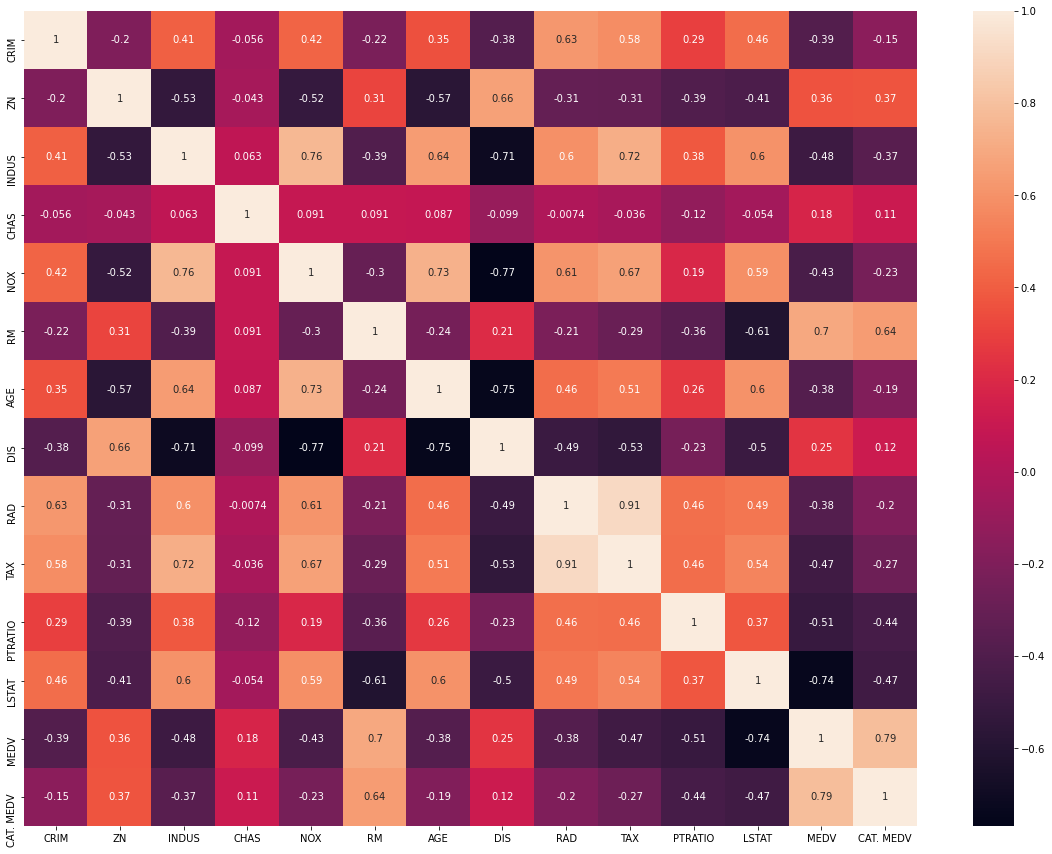

In [4]:
# Heatmap.
plt.figure(figsize=(20, 15))
sns.heatmap(dfBH.corr(),annot=True)
plt.show('png')

### partA
#### Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.
* **</p>I will choose a varaible as my predictor if its correaltion coefficient with CAT.MEDV is greater than 0.3, so ZN, INDUS, RM, PTRATIO, LSTAT, and MEDV will be choosen. However, we should remove MEDV from our predictors becasue understanding the relation between MEDV and CAT.MEDV is meaningless.</p>**


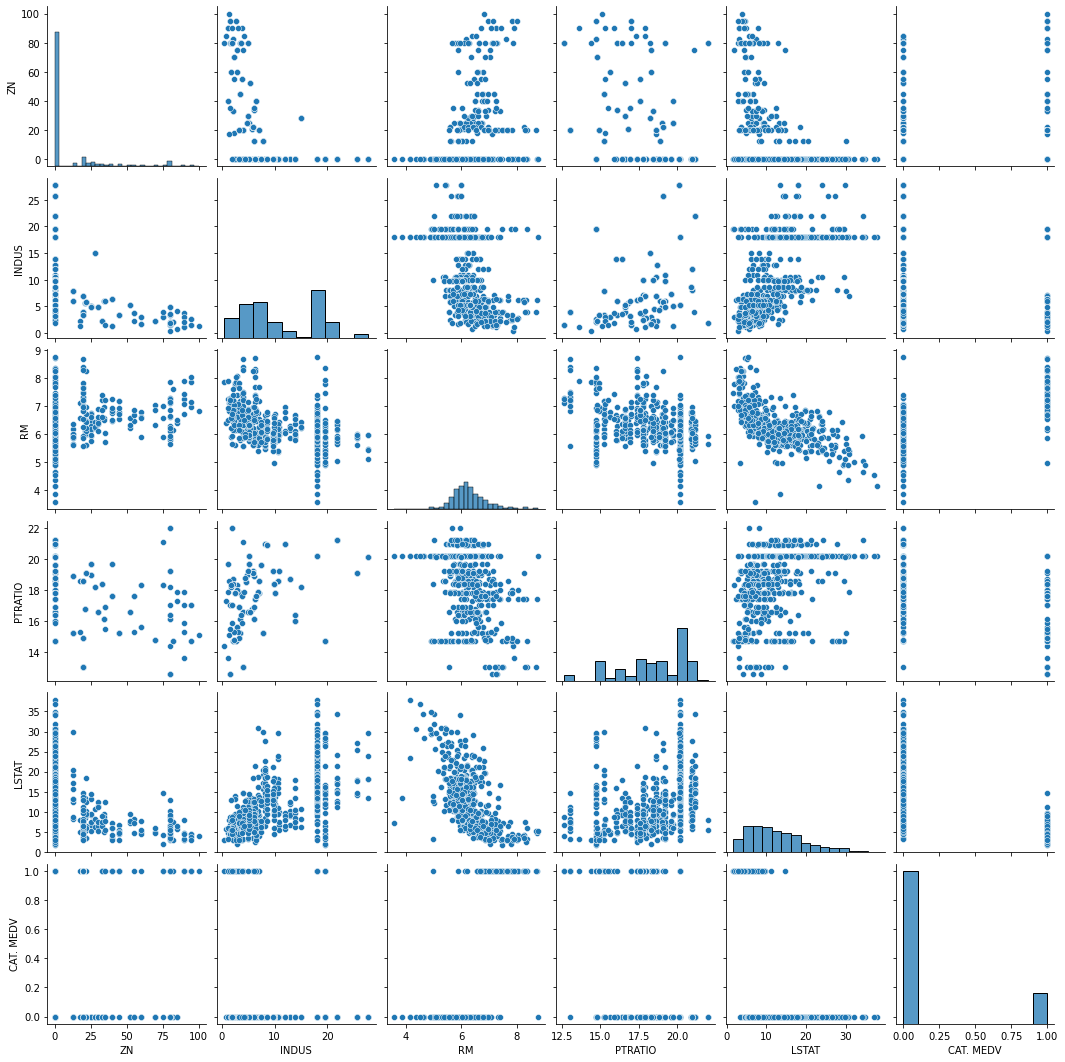

In [5]:
sns.pairplot(dfBH[['ZN', 'INDUS', 'RM', 'PTRATIO','LSTAT','CAT. MEDV']]) # Plot

* **</p>There are many zero values in variable ZN.<p>** 
* **</p>By observing variable CAT. MEDV, we can find this data imbalanced.<p>**
* **</p>Variable LSTAT seems to be a right-skewed distribution.<p>**
* **</p>There is a negative correlation between LSTAT and RM.<p>**

In [6]:
# Split Data
predictors = ['ZN', 'INDUS', 'RM', 'PTRATIO','LSTAT']
X = dfBH[predictors] 
y = dfBH['CAT. MEDV'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1089)

In [7]:
# Normalize Data
X_train_means = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

In [8]:
# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [9]:
# Store predicted probability
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)

In [10]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.00,1.00,0.00,0.23,0.13
1,0.1,0.95,0.18,0.05,0.60,0.84
2,0.2,0.95,0.14,0.05,0.67,0.88
3,0.3,0.90,0.13,0.10,0.65,0.88
4,0.4,0.90,0.07,0.10,0.77,0.93
5,0.5,0.85,0.06,0.15,0.76,0.93
6,0.6,0.80,0.04,0.20,0.78,0.94
7,0.7,0.75,0.02,0.25,0.81,0.95
8,0.8,0.60,0.01,0.40,0.73,0.94
9,0.9,0.45,0.00,0.55,0.62,0.93


### partB
#### choose a classification threshold and explain your choice.

* **</p>As shown in the table above, I will choose 0.7 as my threshold because F1_Score at 0.7 is greater than others. In addition, when we face imbalanced data, F1 score is a better choice to evaluate our model.<p>**

### partC
#### Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?

* **</p>I will choose F1-Score as my performance measure because it is the combination of Recall and Precision, which means it can reflect whether our model can correctly identify positive cases and negative cases.<p>** 
* **</p>If we use Recall <p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use FPR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the positive cases.</font>
* **</p>If we use FNR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use Accuracy<p>** 
><font color='blue'>In this case, we still can get a good performance even if our model is not able to identify the positive cases because there are too few cases in positive.</font>

In [11]:
y_pred_class_lr = binarize([y_pred_prob],threshold=0.4)[0]

# Create Metrics
confusion_lr = metrics.confusion_matrix(y_test, y_pred_class_lr)
recall_value_lr = metrics.recall_score(y_test, y_pred_class_lr).round(3)
fpr_value_lr = (confusion_lr[0,1] / (confusion_lr[0,1] + confusion_lr[0,0]) ).round(2)
fnr_value_lr = (confusion_lr[1,0] / (confusion_lr[1,0] + confusion_lr[1,1]) ).round(2)
f1_value_lr = metrics.f1_score(y_test, y_pred_class_lr).round(2)
accuracy_value_lr = metrics.accuracy_score(y_test, y_pred_class_lr).round(2)  

## Question 2.

In [12]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)

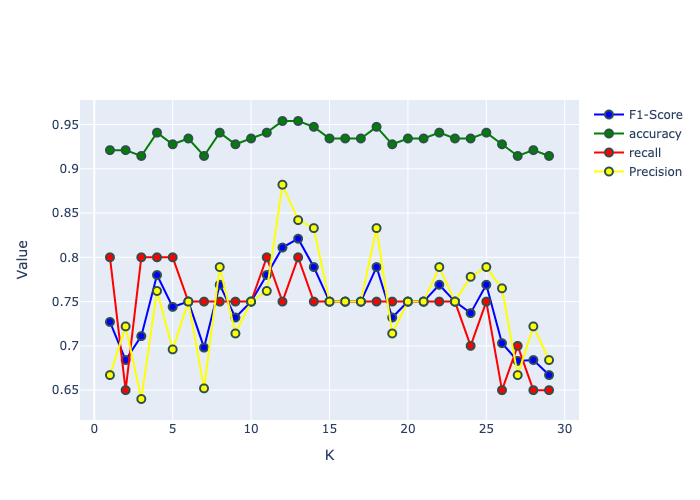

In [13]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['f1_value'],
                         mode='lines+markers',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['accuracy'],
                         mode='lines+markers',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['recall_value'],
                         mode='lines+markers',
                         name='recall',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['precision_score'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show('png')

### partA
#### Choose k, the number of neighbors to use in your classification. Why did you select that value?

* **</p>As shown in the plot above, when k is 13, F1-Score, accuracy, recall, and precision are all high. Although the highest precision occurs when k is euqal to 12, however, other performance metrics are too low, so I will choose 13 as my k number. <p>**



### partB
#### You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.”  If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.

In [14]:
# k=13
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [15]:
# Store predicted probability 
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [16]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,0.95,0.242,0.05,0.535,0.783
1,0.1,0.95,0.174,0.05,0.613,0.842
2,0.2,0.90,0.129,0.10,0.655,0.875
3,0.3,0.80,0.106,0.20,0.640,0.882
4,0.4,0.80,0.061,0.20,0.727,0.921
5,0.5,0.80,0.023,0.20,0.821,0.954
6,0.6,0.70,0.015,0.30,0.778,0.947
7,0.7,0.65,0.008,0.35,0.765,0.947
8,0.8,0.55,0.008,0.45,0.687,0.934
9,0.9,0.55,0.000,0.45,0.710,0.941


### partC 
#### In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).

* **</p>shown in the table in part A, when k is 13, F1-Score, accuracy, recall and precision are all high, so we choose 13 as our number. In part B, we are able to know when threshold is 0.5, F1-score is the highest among all thresholds, so we choose it as our threshold. Because F1-score is the weighted average of Precision and Recall, it can take both False positive and False negative into account, so our goal is to select the value that can give us the highest F1-score.<p>**

In [17]:
knn = KNeighborsClassifier(n_neighbors=18)
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
# Create Metrics
confusion_knn = metrics.confusion_matrix(y_test, y_pred_class)
recall_value_knn = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value_knn = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value_knn = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value_knn = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value_knn = metrics.accuracy_score(y_test, y_pred_class).round(2)

## Question 3.

In [18]:
report=pd.DataFrame({'Method':['LogReg','kNN'],
                     'Recall':[recall_value_lr,recall_value_knn],
                     'FPR':[fpr_value_lr,fpr_value_knn],
                     'FNR':[fnr_value_lr,fnr_value_knn],
                     'FI':[f1_value_lr,f1_value_knn],
                     'Accuracy':[accuracy_value_lr,accuracy_value_knn]
                    })
report

,Method,Recall,FPR,FNR,FI,Accuracy
0,LogReg,0.9,0.07,0.1,0.77,0.93
1,kNN,0.8,0.02,0.2,0.82,0.95


#### Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?
* **</p>In this data, kNN has a better perfomance on F1, so I will go for it.<p>**
    